Phân tích dự đoán xu hướng mua hàng cho ứng dụng TMDT


In [41]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

Thu thập dữ liệu


In [42]:
# loading rating dataset
data = pd.read_csv(
    'D:\Code\Python\pythonTutorial\R10_PBL\pbl_clone\PredictiveAnalytics\data.csv')
print(data.head())

    price  rating  buying_rate
0  420000    5.00        85.75
1  520000    5.00        85.75
2  550000    5.00        85.75
3  990000    4.99        85.75
4  990000    4.99        85.75


Làm sạch và chọn dữ liệu đầu vào


In [43]:
data['price'] = data['price'] // 1000000

Lựa chọn dữ liệu đầu vào


In [44]:
# reshape để chuyển thành cột

x1 = data['price'].values.reshape(-1, 1)
x2 = data['rating'].values.reshape(-1, 1)

X = np.concatenate([x1, x2], axis=1)

y = data['buying_rate'].values.reshape(-1, 1)


print("x1:", x1[:3])
print("x2:", x2[:3])
print("X:", X[:3])
print("y:", y[:3])

x1: [[0]
 [0]
 [0]]
x2: [[5.]
 [5.]
 [5.]]
X: [[0. 5.]
 [0. 5.]
 [0. 5.]]
y: [[85.75]
 [85.75]
 [85.75]]


Phân tích dữ liệu

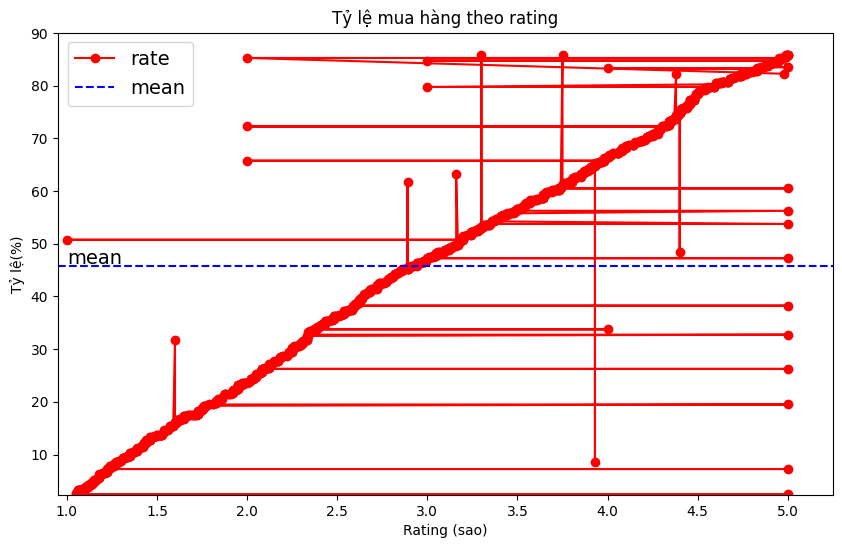

In [45]:
def _plot(x, y, title='', xlabel='', ylabel=''):
    plt.figure(figsize=(10, 6))

    plt.plot(x, y, 'r-o', label='rate')
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y)
    y_max = np.max(y)

    # mean price
    ybar = np.mean(y)
    plt.axhline(ybar, linestyle='--', color='blue', label='mean')
    plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.text(x_min, ybar*1.01, "mean", fontsize=14)
    plt.legend(fontsize=14)
    plt.title(title)

    plt.show()


_plot(x2, y,
      title='Tỷ lệ mua hàng theo rating',
      xlabel='Rating (sao)',
      ylabel='Tỷ lệ(%)')

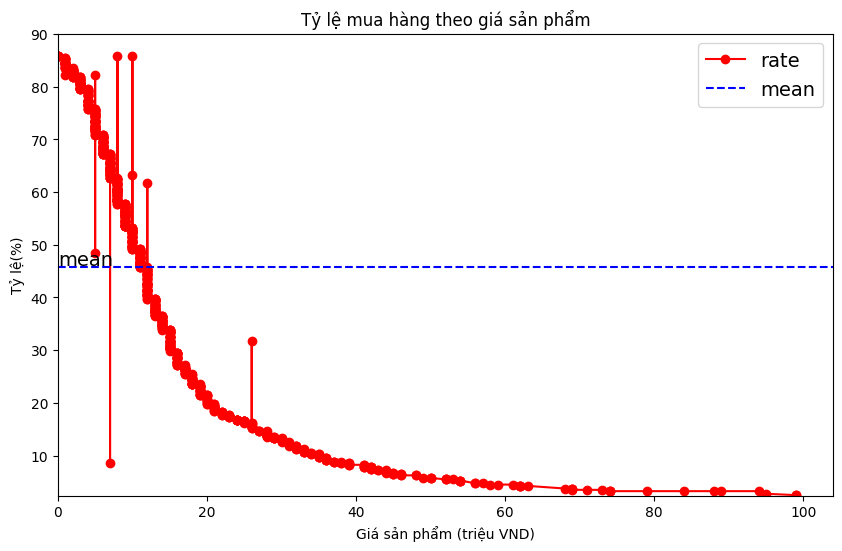

In [46]:
_plot(x1, y,
      title='Tỷ lệ mua hàng theo giá sản phẩm',
      xlabel='Giá sản phẩm (triệu VND)',
      ylabel='Tỷ lệ(%)')

Huấn luyện trên scikit learn

In [47]:
# fit the model by Linear Regression
# fit_intercept = False for calculating the bias
regr = linear_model.LinearRegression(fit_intercept=True)

regr.fit(X, y)

# Compare two results
print('Coefficient : ', regr.coef_)
print('Interception  : ', regr.intercept_)

Coefficient :  [[-0.34213891 16.82204537]]
Interception  :  [0.20186509]


Dự đoán

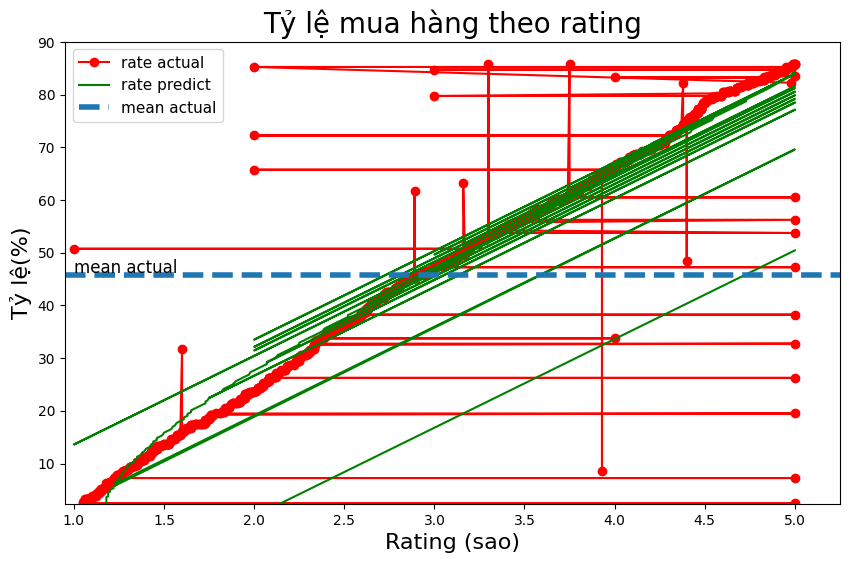

In [48]:
# Dự báo tỷ lệ mua ngay trên tập huấn luyện
ypred = regr.predict(X)

# Visualize data


def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(10, 6))
    plt.plot(x, y_act, 'r-o', label="rate actual")
    plt.plot(x, y_pred, 'g', label="rate predict")
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y_act)
    y_max = np.max(y_act)
    # mean price
    ybar = np.mean(y_act)
    plt.axhline(ybar, linestyle='--', linewidth=4, label="mean actual")
    plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)
    plt.text(x_min, ybar*1.01, "mean actual", fontsize=12)
    plt.legend(fontsize=11)
    plt.title(title, fontsize=20)
    plt.show()


_plot_act_pred(x2, y, ypred,
               title='Tỷ lệ mua hàng theo rating',
               xlabel='Rating (sao)',
               ylabel='Tỷ lệ(%)')

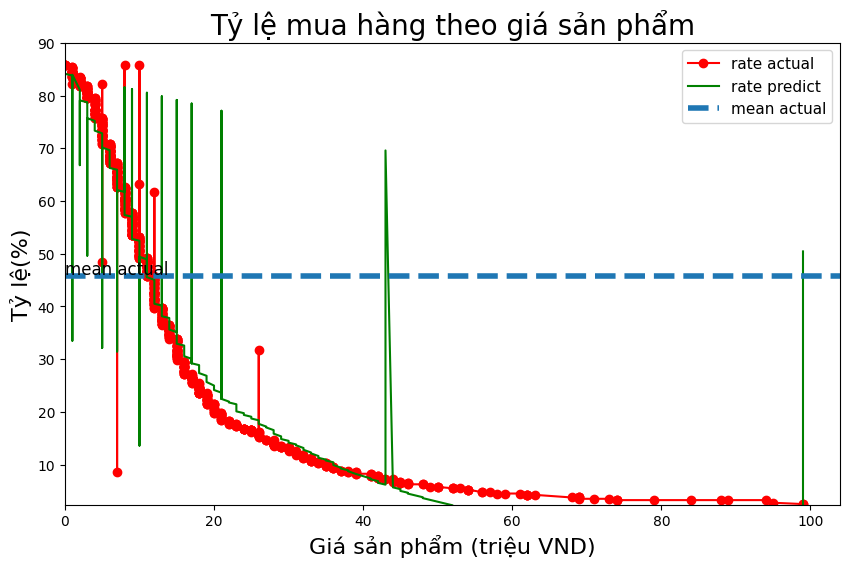

In [49]:
_plot_act_pred(x1, y, ypred,
               title='Tỷ lệ mua hàng theo giá sản phẩm',
               xlabel='Giá sản phẩm (triệu VND)',
               ylabel='Tỷ lệ(%)')

Chuẩn hoá dữ liệu và sử dụng Ridge resgression


In [50]:
# Chuẩn hóa các đặc trưng đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)

rid_regr = Ridge(alpha=0.3)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

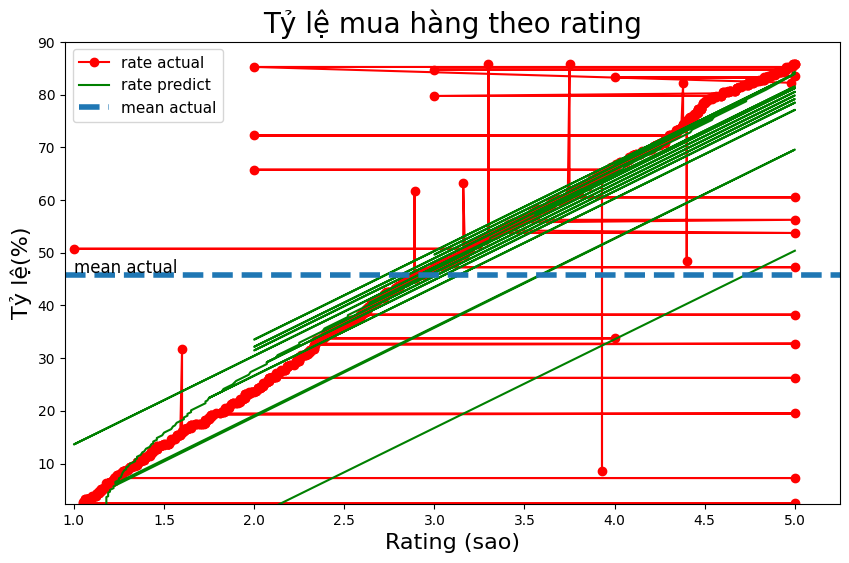

In [51]:
_plot_act_pred(x2, y, y_pred_rid,
               title='Tỷ lệ mua hàng theo rating',
               xlabel='Rating (sao)',
               ylabel='Tỷ lệ(%)')

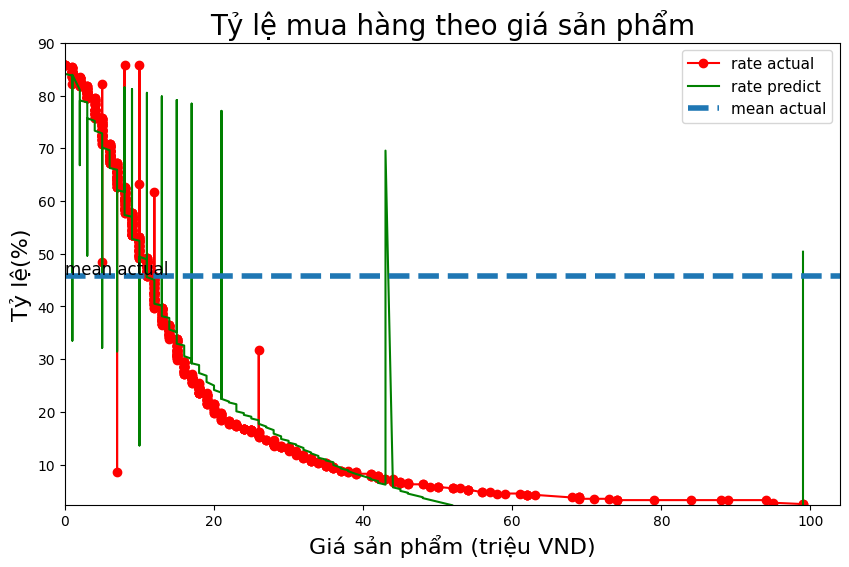

In [52]:
_plot_act_pred(x1, y, y_pred_rid,
               title='Tỷ lệ mua hàng theo giá sản phẩm',
               xlabel='Giá sản phẩm (triệu VND)',
               ylabel='Tỷ lệ(%)')

Tuning hệ số alpha

In [53]:
grid_search = np.arange(0, 1, 0.05)

def _regression(alpha, X_train, y_train, X_test, y_test, models: dict):
  dict_models = {}
  rid_regr = Ridge(alpha = alpha)
  rid_regr.fit(X_train, y_train)
  y_pred = rid_regr.predict(X_test)
  MSE = np.mean((y_test-y_pred)**2)
  dict_models["MSE"] = MSE
  dict_models["model"] = rid_regr
  model_name = "ridge_" + str(alpha)
  models[model_name] = dict_models
  return models

# Phân chia tập huấn luyện, kiểm tra
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=3)
print(X_train.shape, X_test.shape)
print(y_train.shape, y_test.shape)

(820, 2) (205, 2)
(820, 1) (205, 1)


In [54]:
models = {}
for alpha in grid_search:
  models = _regression(round(alpha, 2), X_train, y_train, X_test, y_test, models)

In [55]:
i = 0
for k, v in models.items():
  if i==0:
    best_model = k
    mse = models[k]["MSE"]
  if models[k]["MSE"] < mse:
    best_model = k

  print("model {}, MSE: {}".format(k, models[k]["MSE"]))
  i+=1

print("-----------------------------------------")
print("Best models: {}, MSE: {}".format(best_model, models[best_model]["MSE"]))

model ridge_0.0, MSE: 31.33581342856369
model ridge_0.05, MSE: 31.339328703274308
model ridge_0.1, MSE: 31.342846029201
model ridge_0.15, MSE: 31.34636540317632
model ridge_0.2, MSE: 31.34988682203838
model ridge_0.25, MSE: 31.353410282630737
model ridge_0.3, MSE: 31.356935781802346
model ridge_0.35, MSE: 31.36046331640786
model ridge_0.4, MSE: 31.3639928833071
model ridge_0.45, MSE: 31.36752447936546
model ridge_0.5, MSE: 31.371058101453837
model ridge_0.55, MSE: 31.374593746448376
model ridge_0.6, MSE: 31.378131411230815
model ridge_0.65, MSE: 31.38167109268809
model ridge_0.7, MSE: 31.385212787712756
model ridge_0.75, MSE: 31.388756493202564
model ridge_0.8, MSE: 31.392302206060684
model ridge_0.85, MSE: 31.395849923195716
model ridge_0.9, MSE: 31.399399641521534
model ridge_0.95, MSE: 31.40295135795739
-----------------------------------------
Best models: ridge_0.0, MSE: 31.33581342856369


In [56]:
# Chuẩn hóa các đặc trưng đầu vào
scaler = StandardScaler()
X = scaler.fit_transform(X)

rid_regr = Ridge(alpha=0.0)
rid_regr.fit(X, y)

y_pred_rid = rid_regr.predict(X)

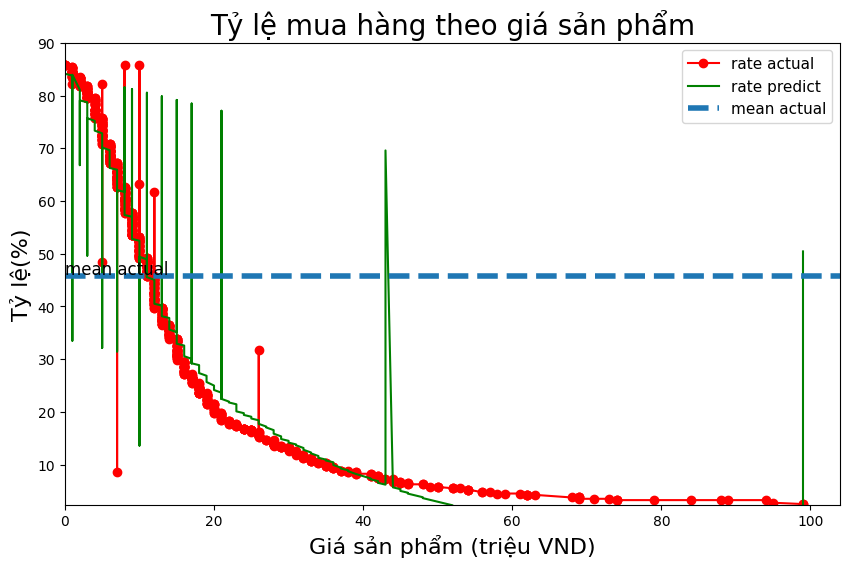

In [57]:
_plot_act_pred(x1, y, y_pred_rid,
               title='Tỷ lệ mua hàng theo giá sản phẩm',
               xlabel='Giá sản phẩm (triệu VND)',
               ylabel='Tỷ lệ(%)')

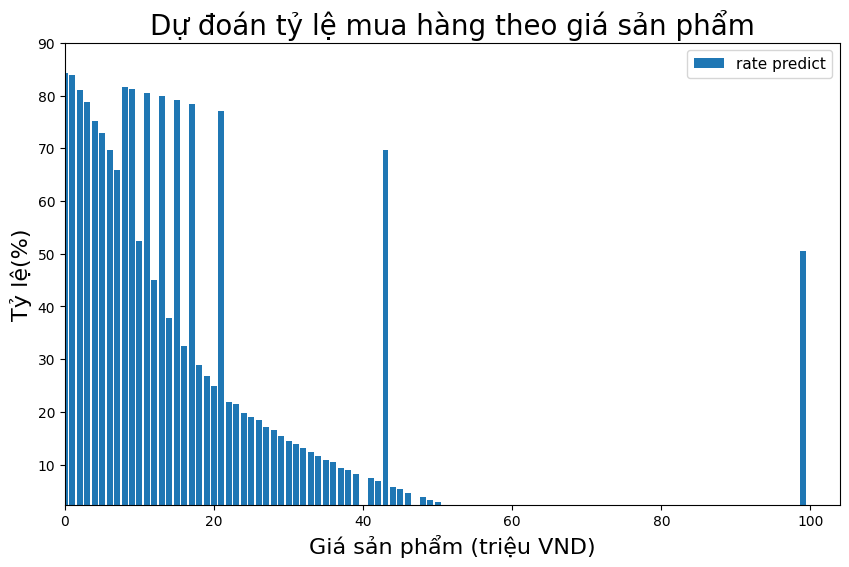

In [69]:
def _plot_act_pred(x, y_act, y_pred, title="", xlabel="", ylabel=""):
    plt.figure(figsize=(10, 6))
    # plt.plot(x, y_act, 'r-o', label="rate actual")
    # plt.plot(x, y_pred, 'g', label="rate predict")
    plt.bar(x.flatten(), y_pred.flatten(), label='rate predict')
    x_min = np.min(x)
    x_max = np.max(x)
    y_min = np.min(y_act)
    y_max = np.max(y_act)

    plt.axis([x_min*0.95, x_max*1.05, y_min*0.95, y_max*1.05])
    plt.xlabel(xlabel, fontsize=16)
    plt.ylabel(ylabel, fontsize=16)

    plt.legend(fontsize=11)
    plt.title(title, fontsize=20)
    plt.show()


_plot_act_pred(x1, y, y_pred_rid,
               title='Dự đoán tỷ lệ mua hàng theo giá sản phẩm',
               xlabel='Giá sản phẩm (triệu VND)',
               ylabel='Tỷ lệ(%)')

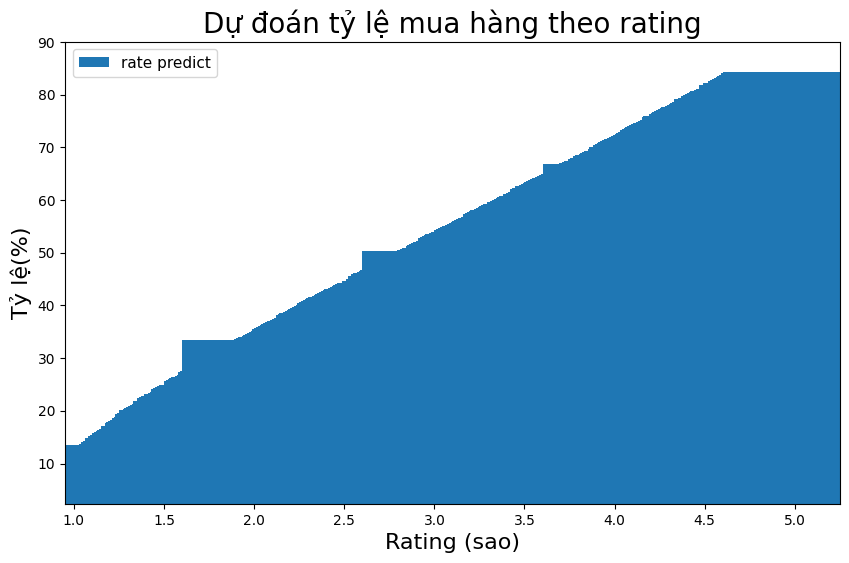

In [70]:
_plot_act_pred(x2, y, y_pred_rid,
               title='Dự đoán tỷ lệ mua hàng theo rating',
               xlabel='Rating (sao)',
               ylabel='Tỷ lệ(%)')